In [ ]:
# @title Install NeMo requirements
"""
You can run either this notebook locally (if you have all the dependencies and a GPU) or on Google Colab.

Instructions for setting up Colab are as follows:
1. Open a new Python 3 notebook.
2. Import this notebook from GitHub (File -> Upload Notebook -> "GITHUB" tab -> copy/paste GitHub URL)
3. Connect to an instance with a GPU (Runtime -> Change runtime type -> select "GPU" for hardware accelerator)
4. Run this cell to set up dependencies.
5. Restart the runtime (Runtime -> Restart Runtime) for any upgraded packages to take effect
"""
# If you're using Google Colab and not running locally, run this cell.

## Install dependencies
!pip install wget unidecode matplotlib>=3.3.2 > /dev/null
!apt-get install sox libsndfile1 ffmpeg > /dev/null

## Install NeMo
#BRANCH = 'r1.0.0rc1'
BRANCH = 'main'
#BRANCH = 'v1.0.0b3'
!python -m pip install git+https://github.com/NVIDIA/NeMo.git@$BRANCH#egg=nemo_toolkit[all] > /dev/null

## Grab the config we'll use in this example
!mkdir configs
!wget -P configs/ https://raw.githubusercontent.com/NVIDIA/NeMo/$BRANCH/examples/asr/conf/config.yaml
!pip install matplotlib==3.1.3
"""
Remember to restart the runtime for the kernel to pick up any upgraded packages (e.g. matplotlib)!
Alternatively, you can uncomment the exit() below to crash and restart the kernel, in the case
that you want to use the "Run All Cells" (or similar) option.
"""
#exit()

In [ ]:
# check if CTC beam decoders are installed
try:
    import ctc_decoders
except ModuleNotFoundError:
    # install beam search decoder
    !apt-get install swig
    !git clone https://github.com/NVIDIA/NeMo -b v1.0.0rc1 > /dev/null
    !cd NeMo/scripts/ && sh ./asr_language_modelling/install_ctc_decoders.sh > /dev/null
    print('Restarting Colab runtime to successfully import built module.')
    print('Please re-run the notebook.')
    import os
    os.kill(os.getpid(), 9)

In [ ]:
#!pip install torchtext==0.8.0 torch==1.7.1 pytorch-lightning==1.2.2
#exit()

In [ ]:
# TPU
#!curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
#!python pytorch-xla-env-setup.py --version 1.7 --apt-packages libomp5 libopenblas-dev

## Load download a pretrained English checkpoint and network configuration

**file, Multidataset-QuartzNet15x5 from NVIDIA NGC**

link: https://ngc.nvidia.com/catalog/models/nvidia:multidataset_quartznet15x5

## Load pretrained model

In [ ]:
# @title import nemo and load pretrained En checkpoint

import nemo
import nemo.collections.asr as nemo_asr
from nemo.collections.asr.models import EncDecCTCModel

quartznet = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="QuartzNet15x5Base-En")

[NeMo W 2021-05-11 17:41:04 optimizers:46] Apex was not found. Using the lamb optimizer will error out.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


[NeMo W 2021-05-11 17:41:09 experimental:28] Module <class 'nemo.collections.asr.data.audio_to_text_dali.AudioToCharDALIDataset'> is experimental, not ready for production and is not fully supported. Use at your own risk.


[NeMo I 2021-05-11 17:41:09 cloud:66] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemospeechmodels/versions/1.0.0a5/files/QuartzNet15x5Base-En.nemo to /root/.cache/torch/NeMo/NeMo_1.0.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo
[NeMo I 2021-05-11 17:41:12 common:674] Instantiating model from pre-trained checkpoint
[NeMo I 2021-05-11 17:41:13 features:252] PADDING: 16
[NeMo I 2021-05-11 17:41:13 features:269] STFT using torch
[NeMo I 2021-05-11 17:41:25 modelPT:434] Model EncDecCTCModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.0.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo.


In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
# @title common voice augmetned copy
!cp /gdrive/MyDrive/Research/audio-noise-analysis/train_data/common_voice_ru/cv-corpus-6.1-2020-12-11/ru/common_voice_dev_other_augmentation.tar .
!tar -xf common_voice_dev_other_augmentation.tar
!rm -rf common_voice_dev_other_augmentation.tar
#DATA_PATH = "/content/gdrive/MyDrive/Research/audio-noise-analysis/train_data/"
!rm -rf *.json
!cp /gdrive/MyDrive/Research/audio-noise-analysis/train_data/common_voice_ru/cv-corpus-6.1-2020-12-11/ru/*.json .
MODEL_CHPT = "/gdrive/MyDrive/Research/audio-noise-analysis/train_data/" + '../models/'
filename_test = 'dev.json'
#filename_train = 'other_augmented.json'
#filename_test = 'other_augmented_dev.json'
filename_train = 'other_augmented_train.json'

In [ ]:
# @title common voice copy

#!cp -r /gdrive/MyDrive/Research/audio-noise-analysis/train_data/common_voice_ru/cv-corpus-6.1-2020-12-11/ru/common_voice_ru.tar.gz .
#!tar -xzf common_voice_ru.tar.gz
#%cd /content/gdrive/MyDrive/Research/audio-noise-analysis/train_data/common_voice_ru/cv-corpus-6.1-2020-12-11/ru
#!cp wavs/dev.json wavs/train.json .
#!ls
#!cp -r /gdrive/MyDrive/Research/audio-noise-analysis/train_data/common_voice_ru/cv-corpus-6.1-2020-12-11/ru/lightning_logs /content/gdrive/MyDrive/Research/audio-noise-analysis/train_data/common_voice_ru/cv-corpus-6.1-2020-12-11/ru
#!cp /gdrive/MyDrive/Research/audio-noise-analysis/train_data/config_init_ru.yml /content/configs/
#!rm -rf /content/common_voice_ru.tar.gz
#
#DATA_PATH = "/content/gdrive/MyDrive/Research/audio-noise-analysis/train_data/"
#COMM_VOICE_RU = DATA_PATH + "common_voice_ru/cv-corpus-6.1-2020-12-11/ru/"
#MODEL_CHPT = "/gdrive/MyDrive/Research/audio-noise-analysis/train_data/" + '../models/'
#filename_test = COMM_VOICE_RU + 'dev.json'
#filename_train = COMM_VOICE_RU + 'train.json'

In [ ]:
# @title open stt copy

!wget https://azureopendatastorage.blob.core.windows.net/openstt/ru_open_stt_opus/archives/asr_calls_2_val.tar.gz
!wget https://azureopendatastorage.blob.core.windows.net/openstt/ru_open_stt_opus/archives/buriy_audiobooks_2_val.tar.gz
!wget https://azureopendatastorage.blob.core.windows.net/openstt/ru_open_stt_opus/archives/public_youtube700_val.tar.gz

!tar -xf buriy_audiobooks_2_val.tar.gz
!tar -xf asr_calls_2_val.tar.gz
!tar -xf public_youtube700_val.tar.gz

!rm -rf buriy_audiobooks_2_val.tar.gz asr_calls_2_val.tar.gz public_youtube700_val.tar.gz

!cp /gdrive/MyDrive/Research/audio-noise-analysis/train_data/open_stt_t*_local.json .

DATA_PATH = "/gdrive/MyDrive/Research/audio-noise-analysis/train_data/"
MODEL_CHPT = DATA_PATH + '../models/'
#filename_test = COMM_VOICE_RU + 'dev.json'
#filename_train = COMM_VOICE_RU + 'train.json'
filename_test = 'open_stt_test_3000_local.json'
filename_train = 'open_stt_train_8000_local.json'

In [ ]:
# @title copy private_buriy_audio_book

!cp /gdrive/MyDrive/Research/audio-noise-analysis/train_data/private_buriy_books/test_augmented_private_buriy_books_20%.json .
!cp /gdrive/MyDrive/Research/audio-noise-analysis/train_data/private_buriy_books/train_augmented_private_buriy_books_20%_70%.json .


!cp /gdrive/MyDrive/Research/audio-noise-analysis/train_data/private_buriy_books/train_augmented_buriy_books_20%_70%.tar .
!tar -xf train_augmented_buriy_books_20%_70%.tar

!cp /gdrive/MyDrive/Research/audio-noise-analysis/train_data/private_buriy_books/test_augmented_buriy_books_20%.tar .
!tar -xf test_augmented_buriy_books_20%.tar

!rm -rf *_books*.tar*

filename_train = "train_augmented_private_buriy_books_20%_70%.json"
filename_test = "test_augmented_private_buriy_books_20%.json"

Whole len: 33691.0 uttrns, whole duration: 51.300425001388895 h., mean duration 5.481628031373364 sec.


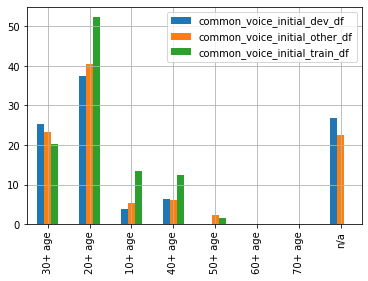

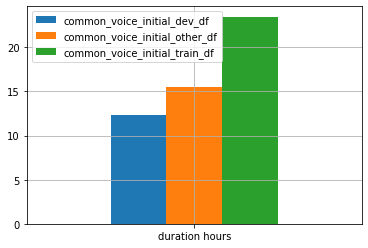

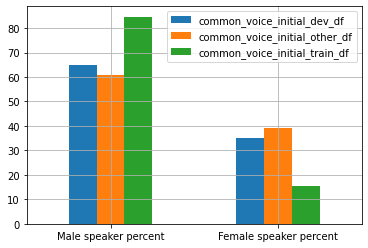

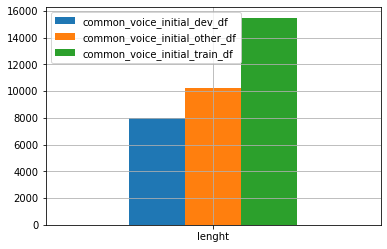

In [ ]:
# @title Common voice manifests analysis

import pandas as pd
import numpy as np
import re
import os
from os import listdir
from scipy.io import wavfile
import codecs
from tqdm import tqdm
import json
import librosa

def get_info(df):
    ages = df.age.unique()
    prefix_age = "Data age distribution "
    info_df = {'Data age distribution thirties': 0, 
               'Data age distribution twenties': 0, 
               'Data age distribution teens': 0,
               'Data age distribution fourties': 0, 
               'Data age distribution fifties': 0, 
               'Data age distribution sixties': 0,
               'Data age distribution seventies': 0, 
               'Data age distribution n/a': 0, 
    }
    info_df["lenght"] = len(df)
    ages_percentage = {}
    sum = 0
    for age_ in ages:
        if type(age_) is str:
            prefix = prefix_age + age_
            info_df[prefix] = len(df[df.age == age_]) / len(df) * 100
            sum+=info_df[prefix]
    info_df[prefix_age + 'n/a'] = 100 - sum
    duration = df.duration.sum() / 60 / 60
    male_percent = len(df[df.gender == 'male']) / len(df) * 100
    female_percent = 100 - male_percent
    #info_df["Age distribution"] = ages_percentage
    info_df["duration hours"] = duration
    info_df["Male speaker percent"] = male_percent
    info_df["Female speaker percent"] = female_percent

    return info_df

def get_datasets_description(df_list):
    df_description = pd.DataFrame()
    for name, df in df_list.items():
        info_df = get_info(df)
        df_description[name] = info_df.values()
        df_description.index = info_df.keys()
    return df_description

def read_json(json_path):
    content = []
    for json_line in codecs.open(json_path, 'r', 'utf-8'):
        try:
            json_data = json.loads(json_line)
        except Exception as exc:
            print(json_path)
            raise IOError("Error reading json: %s" % str(exc))
        content.append(json_data)
    return content


def read_manifest(manifest_path, max_duration=float('inf'), min_duration=0.0):
    manifest = []
    json_data = read_json(manifest_path)
    for json_line in json_data:
        if min_duration <= json_line["duration"] <= max_duration:
            manifest.append(json_line)
    return manifest

data_manifests = "/gdrive/MyDrive/Research/audio-noise-analysis/train_data/common_voice_ru/cv-corpus-6.1-2020-12-11/ru/"
# dataset manifest common voice loading
common_voice_initial_other_train = pd.DataFrame(read_manifest(data_manifests + "other.json"))
common_voice_initial_train_manifest = pd.DataFrame(read_manifest(data_manifests + "train.json"))
common_voice_initial_dev_manifest = pd.DataFrame(read_manifest(data_manifests + "dev.json"))

common_voice_initial_other_df = pd.read_table(data_manifests + "other.tsv")
common_voice_initial_train_df = pd.read_table(data_manifests + "train.tsv")
common_voice_initial_dev_df = pd.read_table(data_manifests + "dev.tsv")

common_voice_initial_other_df["duration"] = common_voice_initial_other_train["duration"]
common_voice_initial_train_df["duration"] = common_voice_initial_train_manifest["duration"]
common_voice_initial_dev_df["duration"] = common_voice_initial_dev_manifest["duration"]

common_voice_description = get_datasets_description({
  "common_voice_initial_dev_df" : common_voice_initial_dev_df,
  "common_voice_initial_other_df" : common_voice_initial_other_df,
  "common_voice_initial_train_df" : common_voice_initial_train_df,
})

ages_df = common_voice_description[:"Data age distribution n/a"]
ages_df.index = ['30+ age', '20+ age', '10+ age', '40+ age',
                 '50+ age', '60+ age', '70+ age', 'n/a']
duration_df = common_voice_description[common_voice_description.index == 'duration hours']
genders_df = common_voice_description["Male speaker percent":]
len_df = common_voice_description[common_voice_description.index == 'lenght']
ages_df.plot.bar(grid=True), duration_df.plot.bar(grid=True, rot=0), genders_df.plot.bar(grid=True, rot=0), len_df.plot.bar(grid=True, rot=0), 

print("Whole len: {} uttrns, whole duration: {} h., mean duration {} sec.".format(
    len_df.T.sum()[0], duration_df.T.sum()[0], 
    duration_df.T.sum()[0] * 60 * 60 / len_df.T.sum()[0]))

In [ ]:
genders_df.T.mean()

Male speaker percent      70.060679
Female speaker percent    29.939321
dtype: float64

In [ ]:
try:
  from google import colab
  COLAB_ENV = True
except (ImportError, ModuleNotFoundError):
  COLAB_ENV = False

# Load the TensorBoard notebook extension
if COLAB_ENV:
  %load_ext tensorboard
  %tensorboard --logdir /gdrive/MyDrive/Research/audio-noise-analysis/train_data/common_voice_ru/cv-corpus-6.1-2020-12-11/ru/lightning_logs/
else:
  print("To use tensorboard, please use this notebook in a Google Colab environment.")

In [ ]:
!cp /gdrive/MyDrive/Research/audio-noise-analysis/train_data/config_init_ru.yml configs/

### Check audio sample rate

In [ ]:
# --- Config Information ---#
import pprint
try:
    from ruamel.yaml import YAML
except ModuleNotFoundError:
    from ruamel_yaml import YAML
config_path = '/content/configs/config_init_ru.yml'

yaml = YAML(typ='safe')
with open(config_path) as f:
    params = yaml.load(f)
print(params['labels'])
print("train batch: ", params['model']['train_ds']['batch_size'])
print("valid batch: ", params['model']['validation_ds']['batch_size'])
print("spec_augment: ", params['model']['spec_augment'])
print("log_prediction: ", params['model']['log_prediction'])

[' ', 'а', 'б', 'в', 'г', 'д', 'е', 'ё', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я']
train batch:  16
valid batch:  16
spec_augment:  {'_target_': 'nemo.collections.asr.modules.SpectrogramAugmentation', 'rect_masks': 5, 'rect_freq': 50, 'rect_time': 120, 'freq_masks': 2, 'freq_width': 15, 'time_masks': 5, 'time_width': 25}
log_prediction:  True


## Transfer learning

In [ ]:
params['model']['train_ds']['manifest_filepath'] = filename_train
params['model']['validation_ds']['manifest_filepath'] = filename_test

In [ ]:
import os
import pytorch_lightning as pl

class CheckpointEveryNSteps(pl.Callback):
    """
    Save a checkpoint every N steps, instead of Lightning's default that checkpoints
    based on validation loss.
    """

    def __init__(
        self,
        save_step_frequency,
        path_to_save,
        prefix="N-Step-Checkpoint",
        use_modelcheckpoint_filename=False,
        check_by_wer=False,
    ):
        """
        Args:
            save_step_frequency: how often to save in steps
            prefix: add a prefix to the name, only used if
                use_modelcheckpoint_filename=False
            use_modelcheckpoint_filename: just use the ModelCheckpoint callback's
                default filename, don't use ours.
        """
        self.path_to_save = path_to_save
        self.save_step_frequency = save_step_frequency
        self.prefix = prefix
        self.use_modelcheckpoint_filename = use_modelcheckpoint_filename
        self.min_loss = 100
        self.min_wer = 1.0
        self.global_metric = 100
        self.check_by_wer = check_by_wer

    def on_batch_end(self, trainer: pl.Trainer, _):
        """ Check if we should save a checkpoint after every train batch """
        epoch = trainer.current_epoch
        global_step = trainer.global_step
        path_to_save = self.path_to_save + 'min_loss/'
        metric = 0

        if (global_step % self.save_step_frequency == 0) and (global_step != 0):
            trainer.run_evaluation()
            val_wer = round(trainer.logged_metrics['val_wer'].item(), 2)
            val_loss = round(trainer.logged_metrics['val_loss'].item(), 2)
            if self.check_by_wer:
                metric = val_wer
            else:
                metric = val_loss
            print("epoch : {}, global_step: {}, val wer: {}, val loss: {}".format(epoch, global_step, val_wer, val_loss))
            if metric < self.global_metric:
                self.global_metric = metric
                path_to_save+='min_loss/'

                if self.use_modelcheckpoint_filename:
                    filename = trainer.checkpoint_callback.filename
                else:
                    filename = f"{self.prefix}_{epoch}_{global_step}_wer_{val_wer}_val_loss_{val_loss}.ckpt"
                ckpt_path = os.path.join(path_to_save, filename)
                print(ckpt_path)
                #if (val_wer < 0.7):
                trainer.save_checkpoint(ckpt_path)


In [ ]:
import copy
from omegaconf import DictConfig
DATA_PATH = "/gdrive/MyDrive/Research/audio-noise-analysis/train_data/"
MODEL_CHPT = DATA_PATH + '../models/'
try:
  from google import colab
  COLAB_ENV = True
except (ImportError, ModuleNotFoundError):
  COLAB_ENV = False

# Load the TensorBoard notebook extension
if COLAB_ENV:
  %load_ext tensorboard
  %tensorboard --logdir lightning_logs/
else:
  print("To use tensorboard, please use this notebook in a Google Colab environment.")
#/gdrive/MyDrive/Research/audio-noise-analysis/train_data/../models/min_loss/min_loss/QuartzNet_buriy_70%_augmented_from_best_0_4__7_35856_wer_0.77_val_loss_41.59.ckpt

quartznet = quartznet.load_from_checkpoint(MODEL_CHPT + 'min_loss/min_loss/' + 'QuartzNet_other_augmented_from_best_0_4__0_498_wer_0.6_val_loss_70.85.ckpt')
#quartznet._wer.log_prediction=params['model']['log_prediction']

new_opt = copy.deepcopy(params['model']['optim'])
new_opt['lr'] = 0.0001
quartznet.setup_optimization(optim_config=DictConfig(new_opt))

quartznet.change_vocabulary(
    new_vocabulary=[
                    ' ', 'а', 'б', 'в', 'г', 'д', 'е', 'ё', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 
                    'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я']
)

# Point to the data we'll use for fine-tuning as the training set
quartznet.setup_training_data(train_data_config=params['model']['train_ds'])

# Point to the new validation data for fine-tuning
quartznet.setup_validation_data(val_data_config=params['model']['validation_ds'])

# And now we can create a PyTorch Lightning trainer and call `fit` again.
trainer = pl.Trainer(gpus=-1, max_epochs=60, callbacks=[CheckpointEveryNSteps(save_step_frequency=498, path_to_save=MODEL_CHPT,prefix='QuartzNet_other_augmented_val_on_dev_from_best_0_4_', check_by_wer=True)], check_val_every_n_epoch=1000000)
trainer.fit(quartznet)

## Inference from best common voice checkpoint: validation WER 0.4.

In [ ]:
# @title Copy audio books dataset OpenSTT

!wget https://azureopendatastorage.blob.core.windows.net/openstt/ru_open_stt_opus/archives/buriy_audiobooks_2_val.tar.gz
!wget https://azureopendatastorage.blob.core.windows.net/openstt/ru_open_stt_opus/manifests/buriy_audiobooks_2_val.csv
!tar -xf buriy_audiobooks_2_val.tar.gz
!rm -rf buriy_audiobooks_2_val.tar.gz

DATA_PATH = "/gdrive/MyDrive/Research/audio-noise-analysis/train_data/"
MODEL_CHPT = DATA_PATH + '../models/'
#filename_test = COMM_VOICE_RU + 'dev.json'
#filename_train = COMM_VOICE_RU + 'train.json'

In [ ]:
# @title Prepare buriy_audiobooks_2_val manifest
DATA_PATH = "/gdrive/MyDrive/Research/audio-noise-analysis/train_data/"

import pandas as pd
import codecs
import json

audio_books_df = pd.read_csv(DATA_PATH + 'open_stt_val_datasets.csv')
audio_books_df = audio_books_df[audio_books_df.audio_filepath.str.contains("buriy_audiobooks_2_val")]
audio_books_df.audio_filepath = audio_books_df.audio_filepath.apply(
    lambda path: path.replace("/gdrive/MyDrive/Research/audio-noise-analysis/train_data/buriy_audiobooks_2_val/buriy_audiobooks_2_val/",
                              "/content/buriy_audiobooks_2_val/")
    )
manifest = []
for idx, row in audio_books_df.iterrows():
    manifest.append({"audio_filepath" : row["audio_filepath"], "duration" : row["duration"], "text" : row["text"]})

with codecs.open("manifest_buriy_audiobooks_val", 'w', encoding='utf-8') as fout:
    for m in manifest:
        fout.write(json.dumps(m, ensure_ascii=False) + '\n')

In [ ]:
# @title Copy common voice test_augmented and manifest comon voice test
!cp /gdrive/MyDrive/Research/audio-noise-analysis/train_data/common_voice_ru/cv-corpus-6.1-2020-12-11/ru/wavs/test_augmented* .
!cp /gdrive/MyDrive/Research/audio-noise-analysis/train_data/common_voice_ru/cv-corpus-6.1-2020-12-11/ru/wavs/test_1000_gdrivepath.json .
!tar -xf test_augmented.tar
!rm -rf *.tar
!rm -rf test_augmented.json
filename_test_dev = "/content/test_augmented_1000_before.json"

In [ ]:
# @title Copy test augmented buriy books
!cp /gdrive/MyDrive/Research/audio-noise-analysis/train_data/private_buriy_books/test_augmented_20%_1000.json .
!cp /gdrive/MyDrive/Research/audio-noise-analysis/train_data/private_buriy_books/test_augmented_buriy_books_20%.tar .

!tar -xf test_augmented_buriy_books_20%.tar
!rm -rf *.tar
filename_test_dev = "/content/test_augmented_20%_1000.json"

In [ ]:
# @title Copy test buriy books
!cp /gdrive/MyDrive/Research/audio-noise-analysis/train_data/private_buriy_books/test_private_buriy_1000.json .
!cp /gdrive/MyDrive/Research/audio-noise-analysis/train_data/private_buriy_books/test_private_buriy_books.tar.gz .

!mkdir test_private_buriy_books
!tar -zxf test_private_buriy_books.tar.gz -C test_private_buriy_books
!rm -rf *.tar*
filename_test_dev = "/content/test_private_buriy_1000.json"

In [ ]:
path_to_chckpt = "/gdrive/MyDrive/Research/audio-noise-analysis/models/min_loss/min_loss/"
path_to_lms = "/gdrive/MyDrive/Research/audio-noise-analysis/train_data/Lms/"
# best checkpoints name:
com_v = "QuartzNet_common_voice__5_5478_wer_0.4_val_loss_23.21.ckpt"
augmented_com_v = "QuartzNet_other_augmented_val_on_dev_from_best_0_4__1_1494_wer_0.43_val_loss_22.26.ckpt"
open_stt = "QuartzNet_RU__0_0_wer_0.6_val_loss_17.65.ckpt"
buriy_augmented = "QuartzNet_buriy_70%_augmented_from_best_0_4__0_498_wer_0.65_val_loss_31.28.ckpt"

augmented_com_v_intermediate = "QuartzNet_other_augmented_from_best_0_4__6_8466_wer_0.6_val_loss_71.07.ckpt"
buriy_augmented_first = "QuartzNet_buriy_augmented_from_best_0_4__5_18426_wer_0.62_val_loss_29.05.ckpt"


#manifest paths
common_voice_augmented_man = "/content/test_augmented_1000_before.json"
comon_voice_clear_man = "/content/test_1000_gdrivepath.json"
buriy_augmented_man = "/content/test_augmented_20%_1000.json"
buriy_clear_man = "/content/test_private_buriy_1000.json"

#lms paths
buriy_test_lm = "private_buriy_test_1000/private_buriy_test_1000.trie.klm"
com_v_lm = "test_common_voice/test_common_voice.trie.klm"

In [ ]:
input_data_3 = [
{"chpt_path" : path_to_chckpt + augmented_com_v_intermediate, "manifest" : buriy_clear_man, "lm_path" : path_to_lms + buriy_test_lm},
{"chpt_path" : path_to_chckpt + augmented_com_v_intermediate, "manifest" : buriy_augmented_man, "lm_path" : path_to_lms + buriy_test_lm},
{"chpt_path" : path_to_chckpt + buriy_augmented_first, "manifest" : comon_voice_clear_man, "lm_path" : path_to_lms + com_v_lm},
{"chpt_path" : path_to_chckpt + buriy_augmented_first, "manifest" : common_voice_augmented_man, "lm_path" : path_to_lms + com_v_lm},
{"chpt_path" : path_to_chckpt + augmented_com_v_intermediate, "manifest" : comon_voice_clear_man, "lm_path" : path_to_lms + com_v_lm},
{"chpt_path" : path_to_chckpt + augmented_com_v_intermediate, "manifest" : common_voice_augmented_man, "lm_path" : path_to_lms + com_v_lm},
{"chpt_path" : path_to_chckpt + buriy_augmented_first, "manifest" : buriy_clear_man, "lm_path" : path_to_lms + buriy_test_lm},
{"chpt_path" : path_to_chckpt + buriy_augmented_first, "manifest" : buriy_augmented_man, "lm_path" : path_to_lms + buriy_test_lm},
]

In [ ]:
from nemo.collections.asr.metrics.wer import WER, word_error_rate
from nemo.collections.asr.models import EncDecCTCModel
from nemo.utils import logging
import torch
from tqdm import tqdm_notebook
import os
import torch
try:
    from torch.cuda.amp import autocast
except ImportError:
    from contextlib import contextmanager

    @contextmanager
    def autocast(enabled=None):
        yield

from ctc_decoders import Scorer, ctc_beam_search_decoder_batch
def BeamSerachInfer(impl, log_probs, log_probs_length):
    probs_list = log_probs
    if impl.input_tensor:
        probs = torch.exp(log_probs)
        probs_list = []
        for i, prob in enumerate(probs):
            probs_list.append(prob[: log_probs_length[i], :])
    res = ctc_beam_search_decoder_batch(
        probs_list,
        impl.vocab,
        beam_size=impl.beam_width,
        num_processes=impl.num_cpus,
        ext_scoring_func=impl.scorer,
        cutoff_prob=impl.cutoff_prob,
        cutoff_top_n=impl.cutoff_top_n,
    )
    return res

def infer_quartznet(filename_test_dev, model_path, lm_path):
    quartznet = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="QuartzNet15x5Base-En")
    quartznet = quartznet.load_from_checkpoint(model_path)
    beam_search_lm = nemo_asr.modules.BeamSearchDecoderWithLM(
      vocab=list(quartznet.cfg.decoder.vocabulary),
      beam_width=1024,
      alpha=2, beta=1.5,
      lm_path=lm_path,
      num_cpus=max(os.cpu_count(), 1),
      input_tensor=True)

    torch.cuda.empty_cache()
    params['model']['validation_ds']['manifest_filepath'] = filename_test_dev
    params['model']['validation_ds']['batch_size'] = 10

    # Setup the test data loader and make sure the model is on GPU
    quartznet.setup_test_data(test_data_config=params['model']['validation_ds'])
    quartznet.cuda()
    quartznet.eval()
    labels_map = dict([(i, quartznet.decoder.vocabulary[i]) for i in range(len(quartznet.decoder.vocabulary))])
    wer = WER(vocabulary=quartznet.decoder.vocabulary)
    hypotheses = []
    references = []

    can_gpu = torch.cuda.is_available()

    for test_batch in tqdm_notebook(quartznet.test_dataloader()):
        if can_gpu:
            test_batch = [x.cuda() for x in test_batch]
        with autocast():
            log_probs, encoded_len, greedy_predictions = quartznet(
                input_signal=test_batch[0], input_signal_length=test_batch[1]
            )
        #print(log_probs.shape, encoded_len)
        
        beam_predictions = BeamSerachInfer(beam_search_lm, log_probs=log_probs, log_probs_length=encoded_len)
        hypotheses += [pred[0][1] for pred in beam_predictions]
        #hypotheses += wer.ctc_decoder_predictions_tensor(greedy_predictions)
        for batch_ind in range(greedy_predictions.shape[0]):
            seq_len = test_batch[3][batch_ind].cpu().detach().numpy()
            seq_ids = test_batch[2][batch_ind].cpu().detach().numpy()
            reference = ''.join([labels_map[c] for c in seq_ids[0:seq_len]])
            references.append(reference)
        del test_batch
    wer_value = word_error_rate(hypotheses=hypotheses, references=references, use_cer=False)
    cer_value = word_error_rate(hypotheses=hypotheses, references=references, use_cer=True)
    print('*' * 10, "RESULT", '*' * 10)
    print("wer: {}, cer: {}, test_manifest: {}\nlm path: {}\nmodel_path:{}".format(round(wer_value, 5), round(cer_value, 5), filename_test_dev, lm_path, model_path))
    return {"wer" : wer_value, "cer" : cer_value, "filename_test_dev" : filename_test_dev, "lm_path" : lm_path, "model_path" : model_path}

In [ ]:
input_data = [
{"chpt_path" : path_to_chckpt + buriy_augmented, "manifest" : buriy_clear_man, "lm_path" : path_to_lms + buriy_test_lm},
{"chpt_path" : path_to_chckpt + buriy_augmented, "manifest" : buriy_augmented_man, "lm_path" : path_to_lms + buriy_test_lm},
{"chpt_path" : path_to_chckpt + augmented_com_v, "manifest" : buriy_clear_man, "lm_path" : path_to_lms + buriy_test_lm},
{"chpt_path" : path_to_chckpt + augmented_com_v, "manifest" : buriy_augmented_man, "lm_path" : path_to_lms + buriy_test_lm},
{"chpt_path" : path_to_chckpt + com_v, "manifest" : comon_voice_clear_man, "lm_path" : path_to_lms + com_v_lm},
{"chpt_path" : path_to_chckpt + com_v, "manifest" : common_voice_augmented_man, "lm_path" : path_to_lms + com_v_lm},
{"chpt_path" : path_to_chckpt + augmented_com_v, "manifest" : comon_voice_clear_man, "lm_path" : path_to_lms + com_v_lm},
{"chpt_path" : path_to_chckpt + augmented_com_v, "manifest" : common_voice_augmented_man, "lm_path" : path_to_lms + com_v_lm},
{"chpt_path" : path_to_chckpt + com_v, "manifest" : buriy_clear_man, "lm_path" : path_to_lms + buriy_test_lm},
{"chpt_path" : path_to_chckpt + com_v, "manifest" : buriy_augmented_man, "lm_path" : path_to_lms + buriy_test_lm},
{"chpt_path" : path_to_chckpt + buriy_augmented, "manifest" : comon_voice_clear_man, "lm_path" : path_to_lms + buriy_test_lm},
{"chpt_path" : path_to_chckpt + buriy_augmented, "manifest" : common_voice_augmented_man, "lm_path" : path_to_lms + buriy_test_lm},
{"chpt_path" : path_to_chckpt + open_stt, "manifest" : buriy_clear_man, "lm_path" : path_to_lms + buriy_test_lm},
{"chpt_path" : path_to_chckpt + open_stt, "manifest" : buriy_augmented_man, "lm_path" : path_to_lms + buriy_test_lm},
]

input_data2 = [
{"chpt_path" : path_to_chckpt + buriy_augmented, "manifest" : buriy_clear_man, "lm_path" : None},
{"chpt_path" : path_to_chckpt + buriy_augmented, "manifest" : buriy_augmented_man, "lm_path" : None},
{"chpt_path" : path_to_chckpt + augmented_com_v, "manifest" : buriy_clear_man, "lm_path" : None},
{"chpt_path" : path_to_chckpt + augmented_com_v, "manifest" : buriy_augmented_man, "lm_path" : None},
{"chpt_path" : path_to_chckpt + com_v, "manifest" : comon_voice_clear_man, "lm_path" : None},
{"chpt_path" : path_to_chckpt + com_v, "manifest" : common_voice_augmented_man, "lm_path" : None},
{"chpt_path" : path_to_chckpt + augmented_com_v, "manifest" : comon_voice_clear_man, "lm_path" : None},
{"chpt_path" : path_to_chckpt + augmented_com_v, "manifest" : common_voice_augmented_man, "lm_path" : None},
{"chpt_path" : path_to_chckpt + com_v, "manifest" : buriy_clear_man, "lm_path" : None},
{"chpt_path" : path_to_chckpt + com_v, "manifest" : buriy_augmented_man, "lm_path" : None},
{"chpt_path" : path_to_chckpt + buriy_augmented, "manifest" : comon_voice_clear_man, "lm_path" : None},
{"chpt_path" : path_to_chckpt + buriy_augmented, "manifest" : common_voice_augmented_man, "lm_path" : None},
{"chpt_path" : path_to_chckpt + open_stt, "manifest" : buriy_clear_man, "lm_path" : None},
{"chpt_path" : path_to_chckpt + open_stt, "manifest" : buriy_augmented_man, "lm_path" : None},
]

In [ ]:
import pandas as pd
results = []

for input in input_data_3:
    res = infer_quartznet(input["manifest"], input["chpt_path"], input["lm_path"])
    results.append(res)
    output_data = pd.DataFrame(results)
    output_data.to_csv("/gdrive/MyDrive/Research/audio-noise-analysis/logs/results_first_part_lm_3.csv")

[NeMo I 2021-05-11 18:04:02 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.0.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo.
[NeMo I 2021-05-11 18:04:02 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.0.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo
[NeMo I 2021-05-11 18:04:02 common:674] Instantiating model from pre-trained checkpoint
[NeMo I 2021-05-11 18:04:05 features:252] PADDING: 16
[NeMo I 2021-05-11 18:04:05 features:269] STFT using torch
[NeMo I 2021-05-11 18:04:06 modelPT:434] Model EncDecCTCModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.0.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo.


[NeMo W 2021-05-11 18:04:08 modelPT:138] Please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: other_augmented_train.json
    sample_rate: 16000
    labels:
    - ' '
    - а
    - б
    - в
    - г
    - д
    - е
    - ё
    - ж
    - з
    - и
    - й
    - к
    - л
    - м
    - н
    - о
    - п
    - р
    - с
    - т
    - у
    - ф
    - х
    - ц
    - ч
    - ш
    - щ
    - ъ
    - ы
    - ь
    - э
    - ю
    - я
    batch_size: 16
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    
[NeMo W 2021-05-11 18:04:08 modelPT:145] Please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_filepath: other_augme

[NeMo I 2021-05-11 18:04:08 features:252] PADDING: 16
[NeMo I 2021-05-11 18:04:08 features:269] STFT using torch
[NeMo I 2021-05-11 18:04:10 collections:173] Dataset loaded with 1000 files totalling 0.49 hours
[NeMo I 2021-05-11 18:04:10 collections:174] 0 files were filtered totalling 0.00 hours


[NeMo W 2021-05-11 18:04:10 nemo_logging:349] /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
    Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
    


[NeMo W 2021-05-11 18:04:10 patch_utils:50] torch.stft() signature has been updated for PyTorch 1.7+
    Please update PyTorch to remain compatible with later versions of NeMo.



********** RESULT **********
wer: 0.55224, cer: 0.41376, test_manifest: /content/test_private_buriy_1000.json
lm path: /gdrive/MyDrive/Research/audio-noise-analysis/train_data/Lms/private_buriy_test_1000/private_buriy_test_1000.trie.klm
model_path:/gdrive/MyDrive/Research/audio-noise-analysis/models/min_loss/min_loss/QuartzNet_other_augmented_from_best_0_4__6_8466_wer_0.6_val_loss_71.07.ckpt
[NeMo I 2021-05-11 18:05:18 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.0.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo.
[NeMo I 2021-05-11 18:05:18 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.0.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo
[NeMo I 2021-05-11 18:05:18 common:674] Instantiating model from pre-trained checkpoint
[NeMo I 2021-05-11 18:05:19 features:252] PADDING: 16
[NeMo I 2021-05-11 18:05:19 features:269] STFT using torch
[NeMo I 2021-05-11 18:05:20 modelPT:434] Model EncDecC

[NeMo W 2021-05-11 18:05:21 modelPT:138] Please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: other_augmented_train.json
    sample_rate: 16000
    labels:
    - ' '
    - а
    - б
    - в
    - г
    - д
    - е
    - ё
    - ж
    - з
    - и
    - й
    - к
    - л
    - м
    - н
    - о
    - п
    - р
    - с
    - т
    - у
    - ф
    - х
    - ц
    - ч
    - ш
    - щ
    - ъ
    - ы
    - ь
    - э
    - ю
    - я
    batch_size: 16
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    
[NeMo W 2021-05-11 18:05:21 modelPT:145] Please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_filepath: other_augme

[NeMo I 2021-05-11 18:05:21 features:252] PADDING: 16
[NeMo I 2021-05-11 18:05:21 features:269] STFT using torch
[NeMo I 2021-05-11 18:05:22 collections:173] Dataset loaded with 1000 files totalling 0.50 hours
[NeMo I 2021-05-11 18:05:22 collections:174] 0 files were filtered totalling 0.00 hours



********** RESULT **********
wer: 0.61384, cer: 0.45898, test_manifest: /content/test_augmented_20%_1000.json
lm path: /gdrive/MyDrive/Research/audio-noise-analysis/train_data/Lms/private_buriy_test_1000/private_buriy_test_1000.trie.klm
model_path:/gdrive/MyDrive/Research/audio-noise-analysis/models/min_loss/min_loss/QuartzNet_other_augmented_from_best_0_4__6_8466_wer_0.6_val_loss_71.07.ckpt
[NeMo I 2021-05-11 18:06:31 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.0.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo.
[NeMo I 2021-05-11 18:06:31 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.0.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo
[NeMo I 2021-05-11 18:06:31 common:674] Instantiating model from pre-trained checkpoint
[NeMo I 2021-05-11 18:06:32 features:252] PADDING: 16
[NeMo I 2021-05-11 18:06:32 features:269] STFT using torch
[NeMo I 2021-05-11 18:06:33 modelPT:434] Model EncDecC

[NeMo W 2021-05-11 18:06:36 modelPT:138] Please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: train_augmented_private_buriy_books_20%.json
    sample_rate: 16000
    labels:
    - ' '
    - а
    - б
    - в
    - г
    - д
    - е
    - ё
    - ж
    - з
    - и
    - й
    - к
    - л
    - м
    - н
    - о
    - п
    - р
    - с
    - т
    - у
    - ф
    - х
    - ц
    - ч
    - ш
    - щ
    - ъ
    - ы
    - ь
    - э
    - ю
    - я
    batch_size: 16
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    
[NeMo W 2021-05-11 18:06:36 modelPT:145] Please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_fil

[NeMo I 2021-05-11 18:06:36 features:252] PADDING: 16
[NeMo I 2021-05-11 18:06:36 features:269] STFT using torch
[NeMo I 2021-05-11 18:06:37 collections:173] Dataset loaded with 1000 files totalling 1.66 hours
[NeMo I 2021-05-11 18:06:37 collections:174] 0 files were filtered totalling 0.00 hours



********** RESULT **********
wer: 0.68082, cer: 0.55871, test_manifest: /content/test_1000_gdrivepath.json
lm path: /gdrive/MyDrive/Research/audio-noise-analysis/train_data/Lms/test_common_voice/test_common_voice.trie.klm
model_path:/gdrive/MyDrive/Research/audio-noise-analysis/models/min_loss/min_loss/QuartzNet_buriy_augmented_from_best_0_4__5_18426_wer_0.62_val_loss_29.05.ckpt
[NeMo I 2021-05-11 18:15:53 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.0.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo.
[NeMo I 2021-05-11 18:15:53 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.0.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo
[NeMo I 2021-05-11 18:15:53 common:674] Instantiating model from pre-trained checkpoint
[NeMo I 2021-05-11 18:15:54 features:252] PADDING: 16
[NeMo I 2021-05-11 18:15:54 features:269] STFT using torch
[NeMo I 2021-05-11 18:15:55 modelPT:434] Model EncDecCTCModel was s

[NeMo W 2021-05-11 18:15:56 modelPT:138] Please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: train_augmented_private_buriy_books_20%.json
    sample_rate: 16000
    labels:
    - ' '
    - а
    - б
    - в
    - г
    - д
    - е
    - ё
    - ж
    - з
    - и
    - й
    - к
    - л
    - м
    - н
    - о
    - п
    - р
    - с
    - т
    - у
    - ф
    - х
    - ц
    - ч
    - ш
    - щ
    - ъ
    - ы
    - ь
    - э
    - ю
    - я
    batch_size: 16
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    
[NeMo W 2021-05-11 18:15:56 modelPT:145] Please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_fil

[NeMo I 2021-05-11 18:15:56 features:252] PADDING: 16
[NeMo I 2021-05-11 18:15:56 features:269] STFT using torch
[NeMo I 2021-05-11 18:15:57 collections:173] Dataset loaded with 1000 files totalling 1.64 hours
[NeMo I 2021-05-11 18:15:57 collections:174] 0 files were filtered totalling 0.00 hours



********** RESULT **********
wer: 0.71881, cer: 0.59319, test_manifest: /content/test_augmented_1000_before.json
lm path: /gdrive/MyDrive/Research/audio-noise-analysis/train_data/Lms/test_common_voice/test_common_voice.trie.klm
model_path:/gdrive/MyDrive/Research/audio-noise-analysis/models/min_loss/min_loss/QuartzNet_buriy_augmented_from_best_0_4__5_18426_wer_0.62_val_loss_29.05.ckpt
[NeMo I 2021-05-11 18:18:14 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.0.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo.
[NeMo I 2021-05-11 18:18:14 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.0.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo
[NeMo I 2021-05-11 18:18:14 common:674] Instantiating model from pre-trained checkpoint
[NeMo I 2021-05-11 18:18:15 features:252] PADDING: 16
[NeMo I 2021-05-11 18:18:15 features:269] STFT using torch
[NeMo I 2021-05-11 18:18:16 modelPT:434] Model EncDecCTCModel

[NeMo W 2021-05-11 18:18:17 modelPT:138] Please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: other_augmented_train.json
    sample_rate: 16000
    labels:
    - ' '
    - а
    - б
    - в
    - г
    - д
    - е
    - ё
    - ж
    - з
    - и
    - й
    - к
    - л
    - м
    - н
    - о
    - п
    - р
    - с
    - т
    - у
    - ф
    - х
    - ц
    - ч
    - ш
    - щ
    - ъ
    - ы
    - ь
    - э
    - ю
    - я
    batch_size: 16
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    
[NeMo W 2021-05-11 18:18:17 modelPT:145] Please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_filepath: other_augme

[NeMo I 2021-05-11 18:18:17 features:252] PADDING: 16
[NeMo I 2021-05-11 18:18:17 features:269] STFT using torch
[NeMo I 2021-05-11 18:18:18 collections:173] Dataset loaded with 1000 files totalling 1.66 hours
[NeMo I 2021-05-11 18:18:18 collections:174] 0 files were filtered totalling 0.00 hours



********** RESULT **********
wer: 0.08776, cer: 0.04278, test_manifest: /content/test_1000_gdrivepath.json
lm path: /gdrive/MyDrive/Research/audio-noise-analysis/train_data/Lms/test_common_voice/test_common_voice.trie.klm
model_path:/gdrive/MyDrive/Research/audio-noise-analysis/models/min_loss/min_loss/QuartzNet_other_augmented_from_best_0_4__6_8466_wer_0.6_val_loss_71.07.ckpt
[NeMo I 2021-05-11 18:21:35 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.0.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo.
[NeMo I 2021-05-11 18:21:35 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.0.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo
[NeMo I 2021-05-11 18:21:35 common:674] Instantiating model from pre-trained checkpoint
[NeMo I 2021-05-11 18:21:36 features:252] PADDING: 16
[NeMo I 2021-05-11 18:21:36 features:269] STFT using torch
[NeMo I 2021-05-11 18:21:36 modelPT:434] Model EncDecCTCModel was suc

[NeMo W 2021-05-11 18:21:37 modelPT:138] Please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: other_augmented_train.json
    sample_rate: 16000
    labels:
    - ' '
    - а
    - б
    - в
    - г
    - д
    - е
    - ё
    - ж
    - з
    - и
    - й
    - к
    - л
    - м
    - н
    - о
    - п
    - р
    - с
    - т
    - у
    - ф
    - х
    - ц
    - ч
    - ш
    - щ
    - ъ
    - ы
    - ь
    - э
    - ю
    - я
    batch_size: 16
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    
[NeMo W 2021-05-11 18:21:37 modelPT:145] Please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_filepath: other_augme

[NeMo I 2021-05-11 18:21:37 features:252] PADDING: 16
[NeMo I 2021-05-11 18:21:37 features:269] STFT using torch
[NeMo I 2021-05-11 18:21:38 collections:173] Dataset loaded with 1000 files totalling 1.64 hours
[NeMo I 2021-05-11 18:21:38 collections:174] 0 files were filtered totalling 0.00 hours



********** RESULT **********
wer: 0.19124, cer: 0.12674, test_manifest: /content/test_augmented_1000_before.json
lm path: /gdrive/MyDrive/Research/audio-noise-analysis/train_data/Lms/test_common_voice/test_common_voice.trie.klm
model_path:/gdrive/MyDrive/Research/audio-noise-analysis/models/min_loss/min_loss/QuartzNet_other_augmented_from_best_0_4__6_8466_wer_0.6_val_loss_71.07.ckpt
[NeMo I 2021-05-11 18:24:53 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.0.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo.
[NeMo I 2021-05-11 18:24:53 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.0.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo
[NeMo I 2021-05-11 18:24:53 common:674] Instantiating model from pre-trained checkpoint
[NeMo I 2021-05-11 18:24:54 features:252] PADDING: 16
[NeMo I 2021-05-11 18:24:54 features:269] STFT using torch
[NeMo I 2021-05-11 18:24:55 modelPT:434] Model EncDecCTCModel w

[NeMo W 2021-05-11 18:24:55 modelPT:138] Please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: train_augmented_private_buriy_books_20%.json
    sample_rate: 16000
    labels:
    - ' '
    - а
    - б
    - в
    - г
    - д
    - е
    - ё
    - ж
    - з
    - и
    - й
    - к
    - л
    - м
    - н
    - о
    - п
    - р
    - с
    - т
    - у
    - ф
    - х
    - ц
    - ч
    - ш
    - щ
    - ъ
    - ы
    - ь
    - э
    - ю
    - я
    batch_size: 16
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    
[NeMo W 2021-05-11 18:24:55 modelPT:145] Please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_fil

[NeMo I 2021-05-11 18:24:55 features:252] PADDING: 16
[NeMo I 2021-05-11 18:24:55 features:269] STFT using torch
[NeMo I 2021-05-11 18:24:56 collections:173] Dataset loaded with 1000 files totalling 0.49 hours
[NeMo I 2021-05-11 18:24:56 collections:174] 0 files were filtered totalling 0.00 hours



********** RESULT **********
wer: 0.2528, cer: 0.22353, test_manifest: /content/test_private_buriy_1000.json
lm path: /gdrive/MyDrive/Research/audio-noise-analysis/train_data/Lms/private_buriy_test_1000/private_buriy_test_1000.trie.klm
model_path:/gdrive/MyDrive/Research/audio-noise-analysis/models/min_loss/min_loss/QuartzNet_buriy_augmented_from_best_0_4__5_18426_wer_0.62_val_loss_29.05.ckpt
[NeMo I 2021-05-11 18:26:03 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.0.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo.
[NeMo I 2021-05-11 18:26:03 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.0.0/QuartzNet15x5Base-En/2b066be39e9294d7100fb176ec817722/QuartzNet15x5Base-En.nemo
[NeMo I 2021-05-11 18:26:03 common:674] Instantiating model from pre-trained checkpoint
[NeMo I 2021-05-11 18:26:04 features:252] PADDING: 16
[NeMo I 2021-05-11 18:26:04 features:269] STFT using torch
[NeMo I 2021-05-11 18:26:05 modelPT:434] Model EncDec

[NeMo W 2021-05-11 18:26:05 modelPT:138] Please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: train_augmented_private_buriy_books_20%.json
    sample_rate: 16000
    labels:
    - ' '
    - а
    - б
    - в
    - г
    - д
    - е
    - ё
    - ж
    - з
    - и
    - й
    - к
    - л
    - м
    - н
    - о
    - п
    - р
    - с
    - т
    - у
    - ф
    - х
    - ц
    - ч
    - ш
    - щ
    - ъ
    - ы
    - ь
    - э
    - ю
    - я
    batch_size: 16
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    tarred_shard_strategy: scatter
    
[NeMo W 2021-05-11 18:26:05 modelPT:145] Please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    manifest_fil

[NeMo I 2021-05-11 18:26:06 features:252] PADDING: 16
[NeMo I 2021-05-11 18:26:06 features:269] STFT using torch
[NeMo I 2021-05-11 18:26:06 collections:173] Dataset loaded with 1000 files totalling 0.50 hours
[NeMo I 2021-05-11 18:26:06 collections:174] 0 files were filtered totalling 0.00 hours



********** RESULT **********
wer: 0.32355, cer: 0.27219, test_manifest: /content/test_augmented_20%_1000.json
lm path: /gdrive/MyDrive/Research/audio-noise-analysis/train_data/Lms/private_buriy_test_1000/private_buriy_test_1000.trie.klm
model_path:/gdrive/MyDrive/Research/audio-noise-analysis/models/min_loss/min_loss/QuartzNet_buriy_augmented_from_best_0_4__5_18426_wer_0.62_val_loss_29.05.ckpt


In [ ]:
output_data

,wer,cer,filename_test_dev,lm_path,model_path
0,0.552242,0.413755,/content/test_private_buriy_1000.json,/gdrive/MyDrive/Research/audio-noise-analysis/...,/gdrive/MyDrive/Research/audio-noise-analysis/...
1,0.613843,0.458981,/content/test_augmented_20%_1000.json,/gdrive/MyDrive/Research/audio-noise-analysis/...,/gdrive/MyDrive/Research/audio-noise-analysis/...
2,0.680825,0.558709,/content/test_1000_gdrivepath.json,/gdrive/MyDrive/Research/audio-noise-analysis/...,/gdrive/MyDrive/Research/audio-noise-analysis/...
3,0.718811,0.593194,/content/test_augmented_1000_before.json,/gdrive/MyDrive/Research/audio-noise-analysis/...,/gdrive/MyDrive/Research/audio-noise-analysis/...
4,0.087765,0.042781,/content/test_1000_gdrivepath.json,/gdrive/MyDrive/Research/audio-noise-analysis/...,/gdrive/MyDrive/Research/audio-noise-analysis/...
5,0.191243,0.126737,/content/test_augmented_1000_before.json,/gdrive/MyDrive/Research/audio-noise-analysis/...,/gdrive/MyDrive/Research/audio-noise-analysis/...
6,0.252802,0.223532,/content/test_private_buriy_1000.json,/gdrive/MyDrive/Research/audio-noise-analysis/...,/gdrive/MyDrive/Research/audio-noise-analysis/...
7,0.323554,0.272189,/content/test_augmented_20%_1000.json,/gdrive/MyDrive/Research/audio-noise-analysis/...,/gdrive/MyDrive/Research/audio-noise-analysis/...


In [ ]:
infer_quartznet(buriy_augmented_man, path_to_chckpt + buriy_augmented, lm_path)

***model: QuartzNet_common_voice__1_996_wer_0.4_val_loss_23.37.ckpt***

*data: manifest_buriy_audiobooks_val (7849 files)*

wer: 0.71196 (by greedy) | 0.72 by (ctc_decoder_predictions_tensor) | 0.5994 (lm on train and dev common voice corpus)

*data: common_voice_test sample (1000 files)*

wer: 0.5168995 (by greedy) | 0.5172 by (ctc_decoder_predictions_tensor) | 0.31568 with (lm on train and dev common voice corpus) | by (lm on test corpus common_voice)

| Data|Size|greedy wer|ctc_decoder_predictions_tensor wer| lm on train and dev common voice corpus|lm on test com voice corpus|
| -------------                 |:---:|:----------:|    :-----:|    ------| -----|
| manifest_buriy_audiobooks_val |7849 | 0.71196    |  0.72     | 0.5994   ||
|common_voice_test sample       |1000 | 0.5168995  |    0.5172 | 0.31568  |0.098|
|common_voice_test augment      |1000 |            |           |          |0.26|

***model: QuartzNet_other_augmented_val_on_dev_from_best_0_4__1_1494_wer_0.43_val_loss_22.26.ckpt***

| Data|Size|greedy wer|ctc_decoder_predictions_tensor wer| lm on train and dev common voice corpus|lm on test com voice corpus|
| -------------                 |:---:|:----------:|    :-----:|    ------| -----|
| manifest_buriy_audiobooks_val |7849 | 0.71196    |  0.72     | 0.5994   ||
|common_voice_test sample       |1000 | 0.5168995  |    0.5172 | 0.31568  |0.098|
|common_voice_test augment      |1000 |            |           |          |0.193|

In [ ]:
quartznet.cfg.decoder.vocabulary

[' ', 'а', 'б', 'в', 'г', 'д', 'е', 'ё', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я']

In [ ]:
beam_search_lm = nemo_asr.modules.BeamSearchDecoderWithLM(
    vocab=list(quartznet.cfg.decoder.vocabulary),
    beam_width=16,
    alpha=2, beta=1.5,
    lm_path=lm_path,
    num_cpus=max(os.cpu_count(), 1),
    input_tensor=False)

In [ ]:
log_probs, encoded_len, greedy_predictions

In [ ]:
for test_batch in quartznet.test_dataloader():
        test_batch = [x.cuda() for x in test_batch]
        targets = test_batch[2]
        targets_lengths = test_batch[3]
        

In [ ]:
import torch
print(torch.cuda.device_count())

0


In [ ]:
!curl https://azureopendatastorage.blob.core.windows.net/openstt/ru_open_stt_opus/archives/private_buriy_audiobooks_2.tar.gz --output /gdrive/MyDrive/Research/audio-noise-analysis/train_data/private_buriy_audiobooks_2.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25.8G  100 25.8G    0     0  39.2M      0  0:11:14  0:11:14 --:--:-- 27.3M
